In [1]:
import sys
from pathlib import Path
import ProbabilisticParcellation.functional_profiles as fp
import ProbabilisticParcellation.hierarchical_clustering as cl
import ProbabilisticParcellation.similarity_colormap as cm
import Functional_Fusion.dataset as ds
import matplotlib.pyplot as plt
import ProbabilisticParcellation.functional_profiles as fp
import pandas as pd
import seaborn as sb


# Import Dash dependencies
base_dir = '/Volumes/diedrichsen_data$/data/Cerebellum/ProbabilisticParcellationModel/Atlases/'
if not Path(base_dir).exists():
    base_dir = '/srv/diedrichsen/data/Cerebellum/ProbabilisticParcellationModel/Atlases/'
if not Path(base_dir).exists():
    base_dir = '/Users/callithrix/Documents/Projects/Functional_Fusion/'
if not Path(base_dir).exists():
    raise (NameError('Could not find base_dir'))
    

## Compare different methods of extracting functional profiles for the atlas regions 
* model: V vectors from emission model (normalized to length 1 within each region)
* individ: Run inidividual segmentation (Estep), then softly average the functional profile for each subject 
* group: Use group map 

For the last two, we can also use a hard assignment of the regions (dseg). 

In [8]:
D = []
type = ['model','individ','group','group_dseg']
for t in type:
    D.append(pd.read_csv(base_dir + 'Profiles/' + f'NettekovenSym32_profile_{t}.tsv',delimiter='\t'))



### Demand dataset

In [48]:
regions = ['D1L','D1R','D2L','D2R','D3L','D3R','D4L','D4R']
reg_colors = [[0.681,0.2444,0.2878],[1.0,0.4204,0.7005],[0.9399,0.3261,1.0],[0.8166,0.1178,0.5079]]

In [4]:
def plot_demand(D):
    regions = ['D1L','D1R','D2L','D2R','D3L','D3R','D4L','D4R']
    T = D[D.dataset=='Demand']
    T = T[['condition'] + regions]
    T= T.melt(id_vars='condition',var_name='region',value_name='Vvalue')
    # Split region into side and region
    T['side']=T.region.str[-1]
    T['reg']=T.region.str[0:2]
    # Split condition into task, difficulty, and material   
    T['task']=[x.split('-')[0] for x in T.condition]
    T['difficulty']=[x.split('-')[1] for x in T.condition]
    sb.barplot(data=T[T.difficulty=='H'],x='region',y='Vvalue',hue='task')


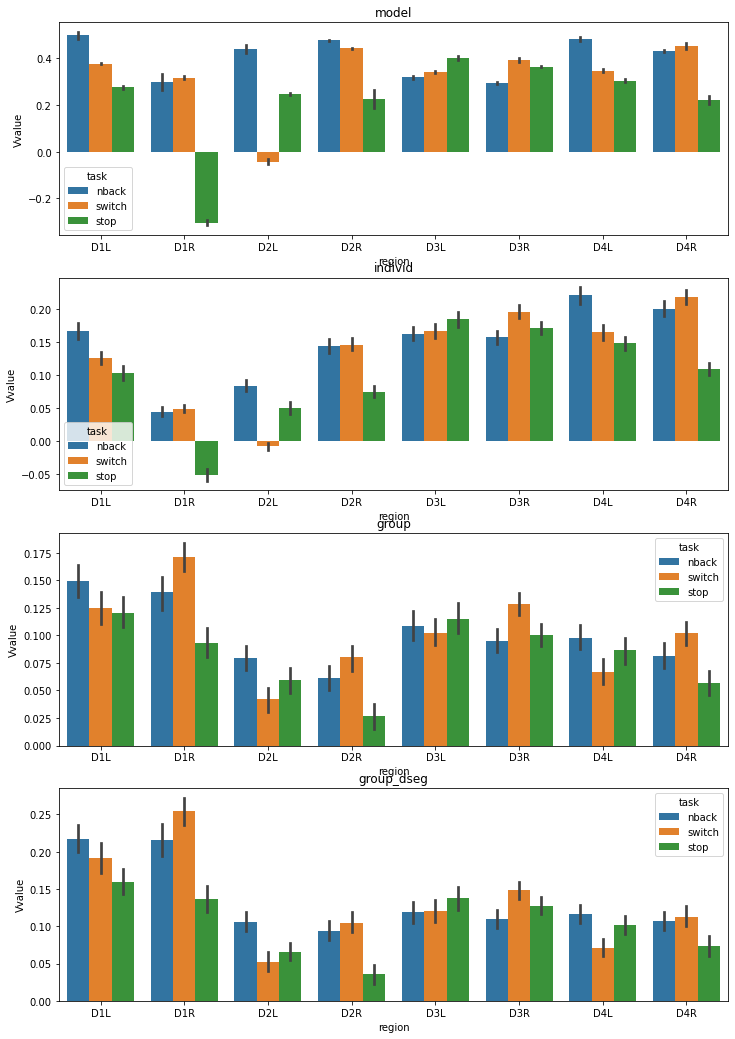

In [9]:
plt.figure(figsize=(12,18))
for i in range(4):
    plt.subplot(4,1,i+1)
    plot_demand(D[i])
    plt.title(type[i])

### WFMS dataset

In [17]:
def plot_cond(D,ds='WMFS'):
    T = D[D.dataset==ds]
    regions = ['D1L','D1R','D2L','D2R','D3L','D3R','D4L','D4R']
    reg_colors = [[0.681,0.2444,0.2878],[1.0,0.4204,0.7005],[0.9399,0.3261,1.0],[0.8166,0.1178,0.5079]]
    T = T[['condition'] + regions]
    T= T.melt(id_vars='condition',var_name='region',value_name='Vvalue')
    # Split region into side and region
    T['side']=T.region.str[-1]
    T['reg']=T.region.str[0:2]
    # Split condition into task, difficulty, and material   
    sb.lineplot(data=T,x='condition',y='Vvalue',hue='reg',palette=reg_colors,hue_order=['D1','D2','D3','D4'],style='reg')
    xt=plt.xticks(rotation=90)

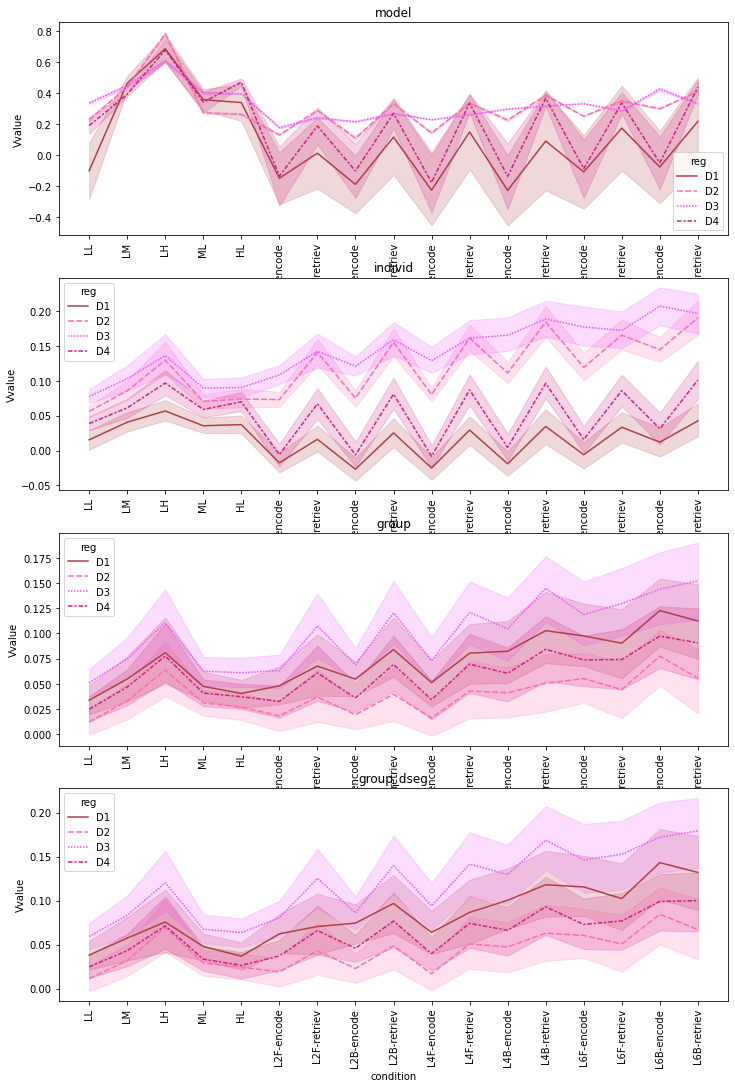

In [18]:
plt.figure(figsize=(12,18))
for i in range(4):
    plt.subplot(4,1,i+1)
    plot_cond(D[i],'WMFS')
    plt.title(type[i])

### MDTB dataset

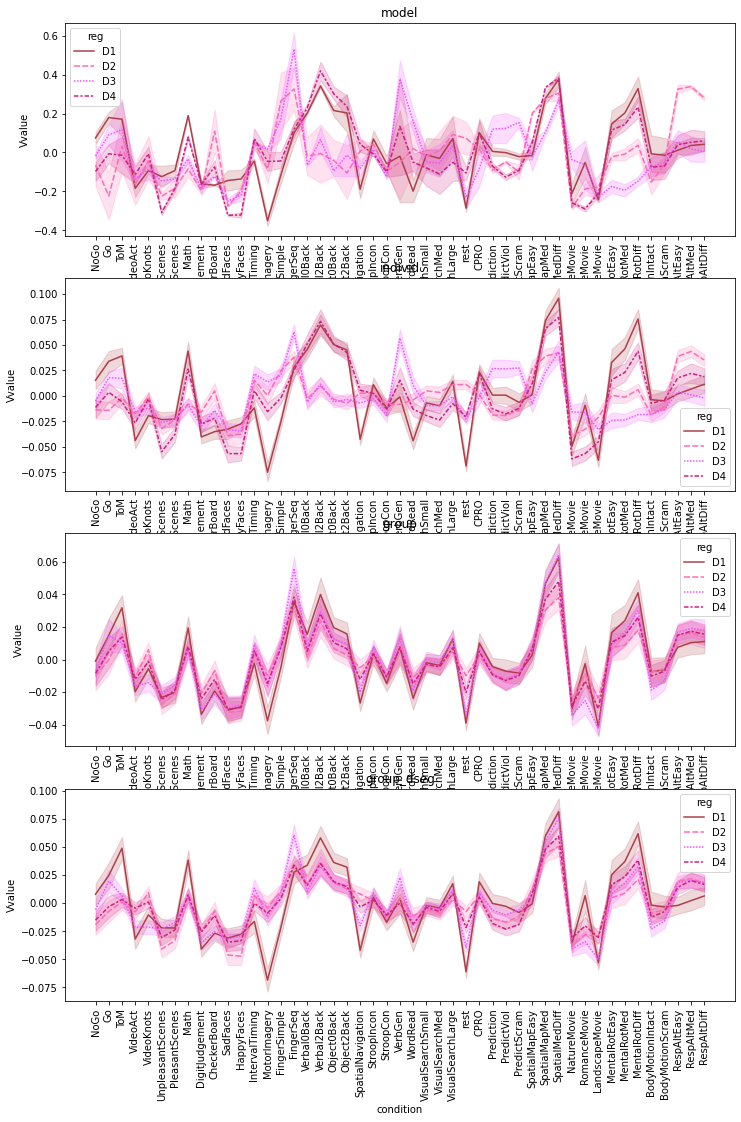

In [19]:
plt.figure(figsize=(12,18))
for i in range(4):
    plt.subplot(4,1,i+1)
    plot_cond(D[i],'MDTB')
    plt.title(type[i])